## **SHIFTKEY x ACENET: Machine Learning Basics**
**Module 2: Implementations of Machine Learning -- Classification**




Here we will be doing a classification analysis on the Iris dataset.

Read about the dataset here:

https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html

https://en.wikipedia.org/wiki/Iris_flower_data_set


We will walk through:

1. Importing relevant libraries
2. Loading the dataset
3. Exploratory data analysis
4. Data preprocessing
5. Define the model
6. Fit model and make predictions
7. Evaluate model
8. Use grid search for better statistics
9. Hyperparameter tuning to optimize model
10. Feature importance to get insights on model

**1. Import libraries**

First, we important the libraries that we will need for our analysis. When doing your own analysis you might add these as you go along, which is good, when you do that it is typical and organized to keep them all at the top of your code.

An overview of some of these libraries:

**Matplotlib:** Plotting.

**Seaborn:** More plotting.

**Pandas:** Manipulation of dataframes.

**NumPy:** Create arrays, use mathematical functions.

**Scikit-learn:** Machine learning.



In [1]:
# IMPORTS

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import load_iris

**2. Loading the dataset**

Now we load the Iris dataset. For practice purposes, we are using an ```sklearn``` dataset, so that we can focus on the machine learning. In practice, this will be more involved.

We will use the Iris extended dataset which can be downloaded here:

https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended?resource=download&select=iris_extended.csv

In [ ]:
# iris = load_iris(as_frame=True)
local = True

if not local:
    from google.colab import files
    uploaded = files.upload()

    # download here: https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended?resource=download
    fn = 'iris_extended.csv'
else:
    fn = './iris_extended.csv'

data = pd.read_csv(fn)

# create a target column
species_mapping = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}
data["target"] = data["species"].map(species_mapping)

In [3]:
for col in data.columns:
    print(col)

data.head()

species
elevation
soil_type
sepal_length
sepal_width
petal_length
petal_width
sepal_area
petal_area
sepal_aspect_ratio
petal_aspect_ratio
sepal_to_petal_length_ratio
sepal_to_petal_width_ratio
sepal_petal_length_diff
sepal_petal_width_diff
petal_curvature_mm
petal_texture_trichomes_per_mm2
leaf_area_cm2
sepal_area_sqrt
petal_area_sqrt
area_ratios
target


,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,target
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478,0
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087,0
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910,0
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166,0
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641,0


In [4]:
# select features
columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
df = data[columns]

**3. Exploratory data analysis**

Now we do Exploratory Data Analysis, also known as EDA, to examine our dataset. It is very important to understand your dataset in order to conduct a meaningful analysis.

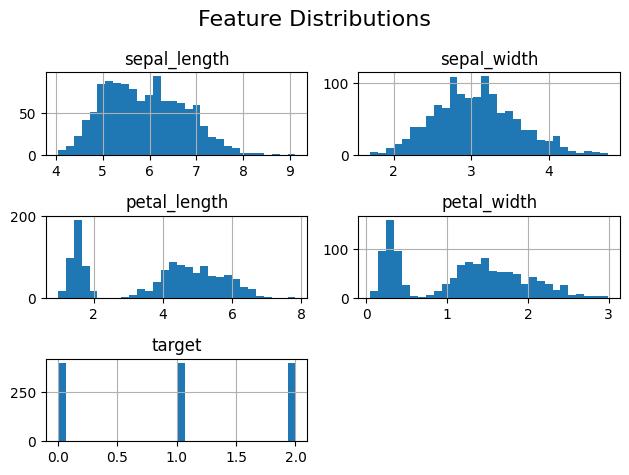

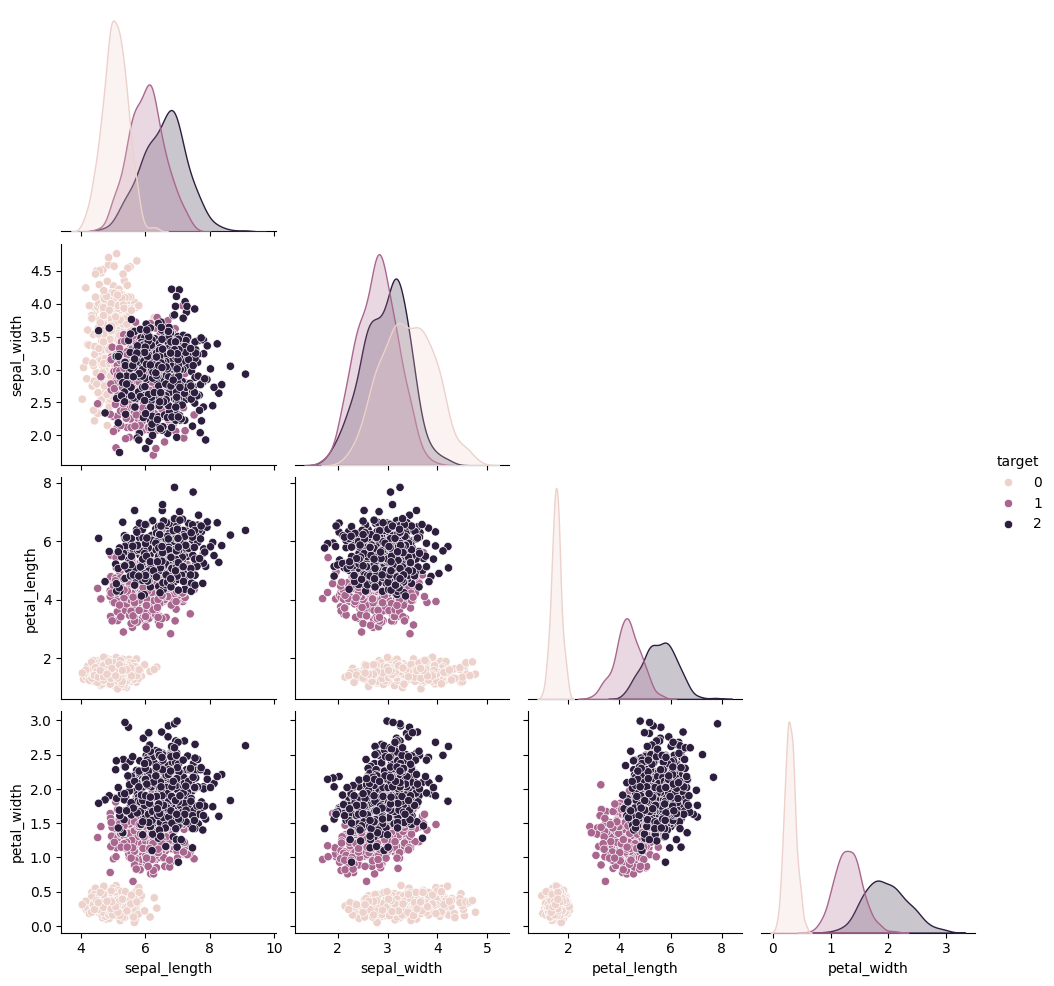

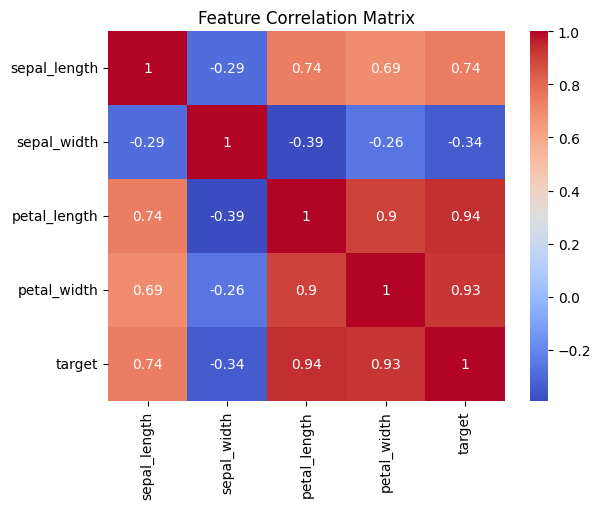

In [5]:
# exploratory data analysis

# distributions
df.hist(bins = 30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()

# pairplot
sns.pairplot(df,hue = 'target', corner = True)

# correlation matrix
plt.figure()
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**4. Data preprocessing**

Now we do our data preprocessing, where we prepare the data to be input to the model. Since we are using the Iris dataset there is not too much to do in this particular instance, but typically this involves:

**Imputation:** Filling in missing values through various methods.
https://scikit-learn.org/stable/modules/impute.html

**Scaling:** Scale features of the data to be within a certain range (for example 0 to 1).
https://scikit-learn.org/stable/modules/preprocessing.html

ONE METHOD (key emphasis on one of many) is to use the ```sklearn``` method called ```Pipeline```. This allows for an easy way to chain together the preprocessing steps with the model in a way that we will know what works. When using ```sklearn``` machine models I like to use this. If you want to use a different library, for example if you are doing deep learning and using ```PyTorch``` to create a neural network, you will need to manually apply the preprocesssing transformations to your data. If you would like to learn more about this, keep an eye out for ACENET's upcoming training sessions!

NOTE:

We use $X$ to represent our inputs aka the features.

We use $y$ to represent our output aka the target.

In [6]:
# data preprocessing

X = df.drop(columns = ['target'])
y = df['target']

numeric_features = X.columns.tolist()

numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features)
    ]
)

**5. Define the model**

Now we define our classifier model. Keep an eye on the parameters we select, these are what we fine-tune later.

We then call the ```sklearn.Pipeline``` method to chain together our preprocessor and our classifier model.

In [7]:
# from sklearn.ensemble import RandomForestClassifier

# select model we will use random forest classifier

classifier = RandomForestClassifier(
    n_estimators=100,            # number of trees in the forest
    max_depth=None,              # maximum depth of each tree (None = expand until all leaves are pure)
    min_samples_split=2,         # minimum number of samples required to split an internal node
    random_state=1997            # ensures reproducibility
)


iris_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',classifier)
])

Now, we split the dataset into training and testing subsets. This is because we want to use a portion of the data to "fit" the model, and a **SEPARATE** portion of the data to test and evaluate the model.

**IT IS EXTREMELY IMPORTANT THAT THE TRAINING AND TESTING SUBSETS DO NOT MIX, OR YOUR MODEL IS COMPLETELY INVALID!**

In [8]:
# now split the data for fitting

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    shuffle = True,
    stratify = y,
    random_state = 1997
)

**6. Fit model and make predictions**

Now we fit the model. Since we used the ```Pipeline```, this very simple where we can just do ```iris_model.fit``` and it will automatically apply the preprocessing and then do the fit to learn the model weights. Remember that you **fit** with the **training** data.

In [9]:
# now fit the model

iris_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width'])])),
                ('classifier', RandomForestClassifier(random_state=1997))])

**7. Evaluate model**

Now that we have fit the model, we can make predictions on the testing data and evaluate the model. Recall the precision, recall, and F1-score from Module 1 last week.

We also calculate the confusion matrix display which summarizes the performance of a classification model by comparing the true labels to the predicted labels. This gives us a more detailed evaluation of the model that cannot be quantified with just a single number. Ideally the largest values in the matrix would be on the diagonal. Large values off the diagonal to a certain direction (upper or lower part of the matrix) could indicate a systematic bias in the classifier.

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00       120
  versicolor       0.91      0.90      0.90       120
   virginica       0.90      0.91      0.90       120

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



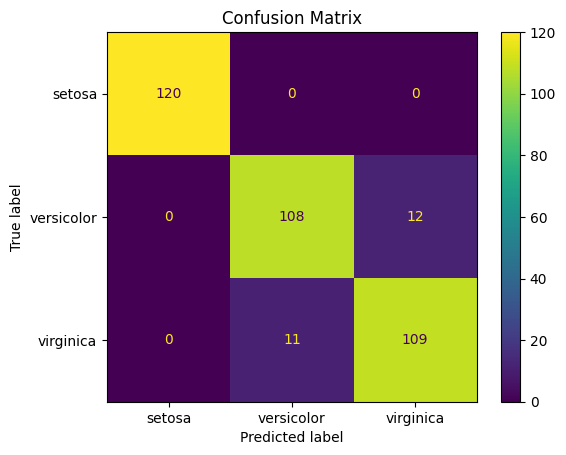

In [ ]:
# now that the model is fit, predict the testing data and do evaluation metrics

y_pred = iris_model.predict(X_test)

species_names = ['setosa','versicolor','virginica']

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=species_names))
report = classification_report(y_test, y_pred, output_dict=True)

disp = ConfusionMatrixDisplay.from_estimator(iris_model,
                                             X_test,y_test,
                                             display_labels = species_names)
disp.ax_.set_title('Confusion Matrix')
plt.show()

**7.1 Feature importance**

Now we calculate the feature importance. In supervised learning tasks like this classification, not all of the input features will contribute equally to the outcome. Some of the features will be a stronger predictor of the target, and others may be weaker predictors or redundant.

Understanding the feature importance in your model can help with interpreting the model as you can see how each feature effects the output. This could be very useful for example in a science experiement, as you could see which measurements affect the outcome the most which can help to inform future studies.

        Feature  Importance
3   petal_width    0.467683
2  petal_length    0.417026
0  sepal_length    0.092350
1   sepal_width    0.022941


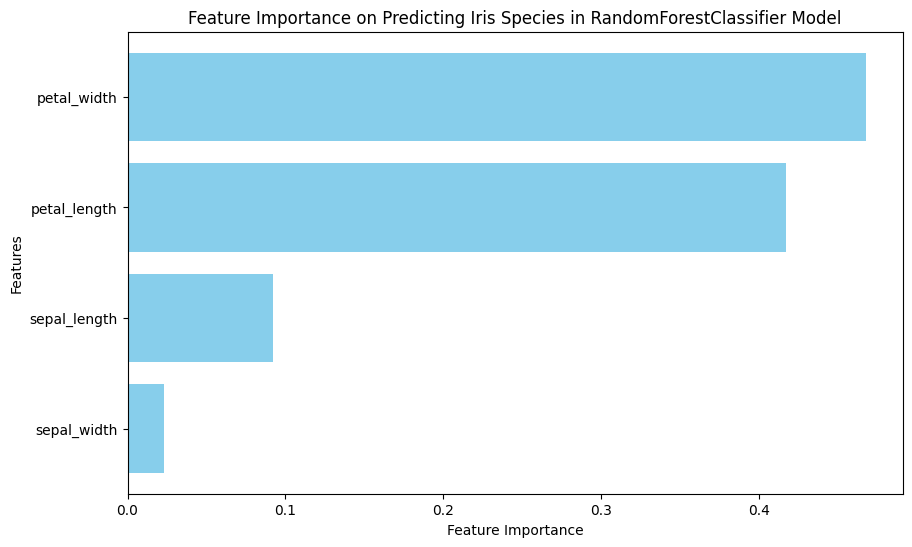

In [14]:
# FEATURE IMPORTANCE

# get feature importance from best xgb model
feature_importance = iris_model.named_steps['classifier'].feature_importances_

# match feature importance with feature names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importance})

# sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)

# print top features
print(feature_importance_df)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance on Predicting Iris Species in RandomForestClassifier Model")
plt.gca().invert_yaxis()  # Invert axis to show highest importance at the top
plt.show()

**8. Cross validation for better statistics**

Before we were splitting the data into a single instance of training and validation subsets, the model was fit with the training data, and then evaluated on the validation data. 

This is a very valid method, but keep this in mind: When we do this split and get performance metrics like accuracy, confusion matrix, etc, these are basically one possible calculation of the performance metrics. These metrics could change if we split the data differently!

For example, let's say our data consists of `A,B,C,D,E`. If we use `A,B,C,D` for training and then `E` for validation, that will give us a set of performance metrics.

What if we did the analysis 5 times with the following combinations:

Training: `A,B,C,D`, Validation: `E`

Training: `A,B,C,E`, Validation: `D`

Training: `A,B,D,E`, Validation: `C`

Training: `A,C,D,E`, Validation: `B`

Training: `B,C,D,E`, Validation: `A`

And then averaged the performance metrics from each of these experiments? This would give us a more robust idea of the performance of the model that is less dependent on the specific training and validation split that we used.

In [15]:
cv_scores = cross_val_score(iris_model,X,y,
                            cv = 5,
                            scoring='accuracy')

# print cross-validation results
print(f"Cross-validated Accuracy Scores: {cv_scores}")
print(f"Average Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.4f}")

Cross-validated Accuracy Scores: [0.94583333 0.95416667 0.92083333 0.95833333 0.975     ]
Average Accuracy: 0.9508
Standard Deviation of Accuracy: 0.0178


**9. Hyperparameter tuning**

Remember we defined our classifier model like this:

classifier = RandomForestClassifier(
    n_estimators=100,            # number of trees in the forest
    max_depth=None,              # maximum depth of each tree (None = expand until all leaves are pure)
    min_samples_split=2,         # minimum number of samples required to split an internal node
    random_state=1997            # ensures reproducibility
)

How can we decide these parameters like number of estimators or max depth? We can guess, run the model, and look at the performance metrics. We can then make slightly different guesses and repeat the process. Hyperparameter tuning is a systematic way of automating this process.

We use grid search parameter tuning, where we define a grid of parameters to test, and every combination is then tested.

The `sklearn` function `GridSearchCV` combines the grid search for hyperparameter tuning with the cross validation (where you set the number of folds with the parameter `cv`). From the results you can then load the best model.

There are also other methods for hyperparameter tuning like random search, where you can define a larger grid and instead of every possible combinations, combinations are chosen at random. There is also Bayesian search where statistics are used to find the best combination of hyperparameters.

In [16]:
# hyperparameter tuning to find the best model

param_grid = {
    'classifier__n_estimators': [7,10,13,16],
    'classifier__max_depth': [None, 5, 10,15],
    'classifier__min_samples_split': [2, 5, 10,15]
}

grid_search = GridSearchCV(estimator=iris_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=1,
                           verbose=1)

grid_search.fit(X,y)

# print best params and corresponding score
print(f'best hyperparams: {grid_search.best_params_}')
best_accuracy = grid_search.best_score_
print(f'best accuracy from GridSearchCV: {best_accuracy:.2f}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
best hyperparams: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 10}
best accuracy from GridSearchCV: 0.95


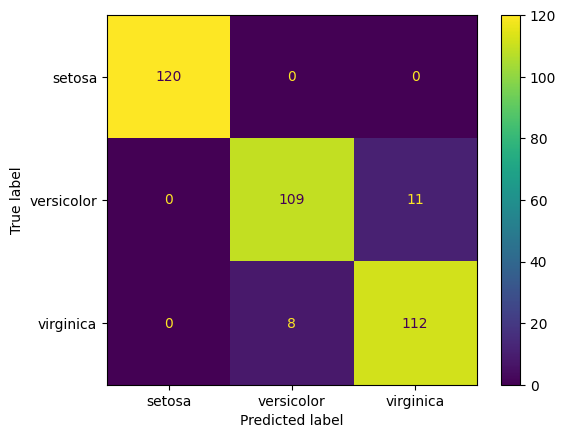

In [17]:
# now do predictions with the best model and look at the confusion matrix again

best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_predict_optimized = best_model.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(best_model,
                                             X_test,y_test,
                                             display_labels = ['setosa','versicolor','virginica'])

        Feature  Importance
3   petal_width    0.505782
2  petal_length    0.331619
0  sepal_length    0.150676
1   sepal_width    0.011923


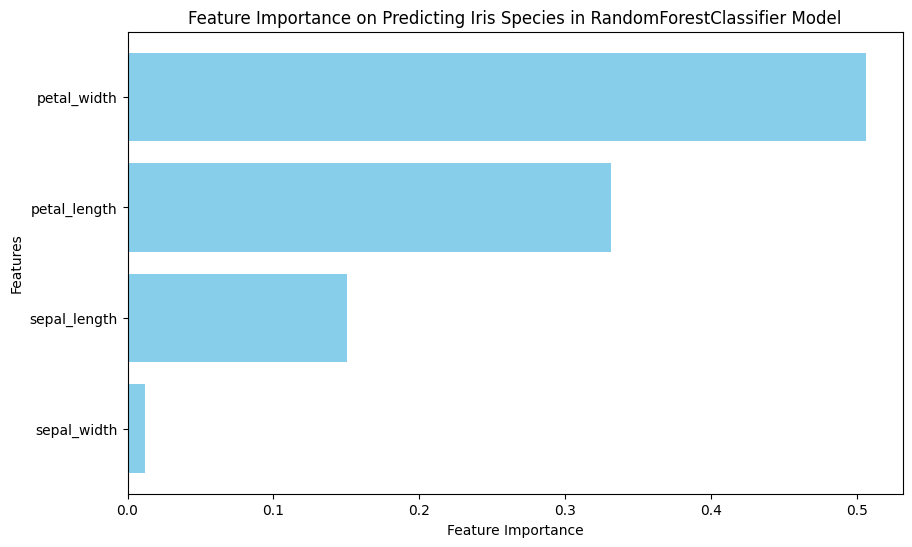

In [18]:
# FEATURE IMPORTANCE AGAIN

# get feature importance from best xgb model
feature_importance = best_model.named_steps['classifier'].feature_importances_

# match feature importance with feature names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importance})

# sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)

# print top features
print(feature_importance_df)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance on Predicting Iris Species in RandomForestClassifier Model")
plt.gca().invert_yaxis()  # Invert axis to show highest importance at the top
plt.show()